# Quantify nonlinearity of temperature responses

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from scipy import optimize
from estimation import *

In [2]:
# Forcing ratios from Gregory regressions
erf_ratios_0p5x_df = pd.read_csv('../Other_estimates/forcing_ratios_2x_to_0p5x.csv', index_col=0)['Mean']
erf_ratios_4x_df = pd.read_csv('../Other_estimates/forcing_ratios_2x_to_4x.csv', index_col=0)['Mean']

erf_ratios_4x_longrunmip_df = pd.read_csv('../Other_estimates/forcing_ratios_2x_to_4x_longrunmip.csv', index_col=0)['Mean']

models_2x = list(erf_ratios_4x_df.index[:-2])
models_0p5x = list(erf_ratios_0p5x_df.index[:-2])
longrunmip_models = list(erf_ratios_4x_longrunmip_df.index[:-2])
#longrunmip_models.remove('FAMOUS')
erf_ratios_4x_longrunmip_df =  erf_ratios_4x_longrunmip_df.loc[longrunmip_models]

In [3]:
longrunmip_models

['MPIESM12', 'HadCM3L', 'FAMOUS', 'CNRMCM61', 'CESM104', 'CCSM3']

In [4]:
erf_ratios_4x_longrunmip_df

MPIESM12    0.449888
HadCM3L     0.478543
FAMOUS      0.643518
CNRMCM61    0.494146
CESM104     0.422806
CCSM3       0.453878
Name: Mean, dtype: float64

In [5]:
erf_ratios_0p5x_df[:-2].values

array([-1.07958291, -1.1546979 , -1.10125562, -1.01064097, -1.4054441 ,
       -1.16936745, -0.90468041, -1.30891436, -1.00833715])

In [6]:
models_0p5x

['CESM2',
 'CNRM-CM6-1',
 'CanESM5',
 'GISS-E2-1-G',
 'IPSL-CM6A-LR',
 'MIROC6',
 'MRI-ESM2-0',
 'TaiESM1',
 'HadGEM3-GC31-LL']

CESM2              1.277005
CNRM-CM6-1         1.312226
CanESM5            0.867844
GISS-E2-1-G        1.049045
GISS-E2-1-H             NaN
GISS-E2-2-G             NaN
GISS-E2-2-H             NaN
IPSL-CM6A-LR       0.995551
MIROC6             1.395026
MRI-ESM2-0         0.922683
TaiESM1            1.236016
HadGEM3-GC31-LL    1.117238
Name: 2x/0p5x, dtype: object


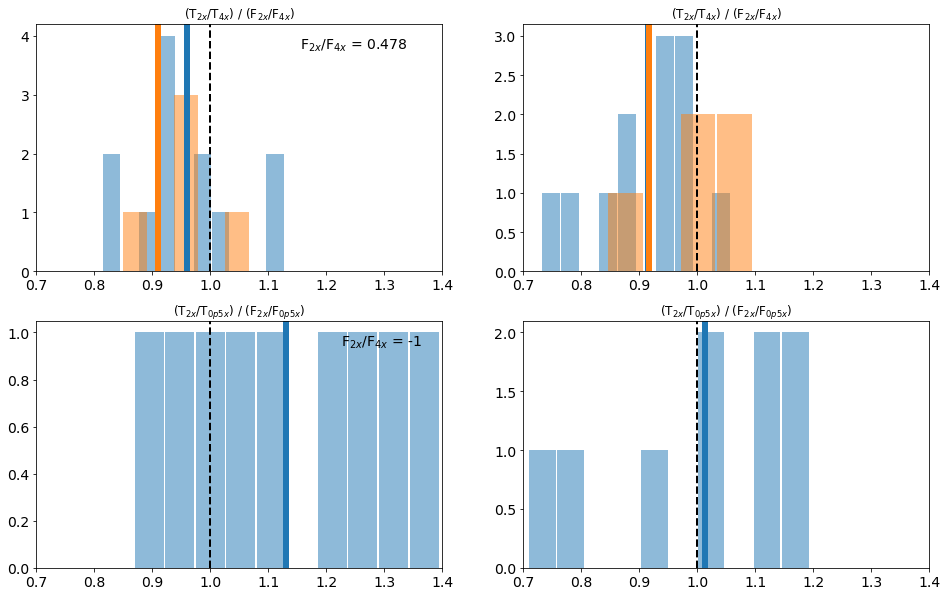

In [7]:

T_ratios = pd.DataFrame([],index = models_2x, columns = ['2x/4x', '2x/0p5x'])
T_ratios_longrunmip = pd.DataFrame([],index = longrunmip_models, columns = ['2x/4x, 150 yr', '2x/4x, all yrs',])

for model in models_2x:
    exp = 'abrupt-4xCO2'
    members = find_members(model, exp)
    T_4x = member_mean_tas(model, members, length_restriction = 150, exp = exp)[1:]

    exp = 'abrupt-2xCO2'
    members = find_members(model, exp)
    T_2x = member_mean_tas(model, members, length_restriction = 150, exp = exp)[1:]
    
    T_ratios.loc[model]['2x/4x'] = np.mean(T_2x/T_4x)
    
for model in models_0p5x:
    exp = 'abrupt-0p5xCO2'
    members = find_members(model, exp)
    T_0p5x = member_mean_tas(model, members, length_restriction = 150, exp = exp)[1:]
    
    exp = 'abrupt-2xCO2'
    members = find_members(model, exp)
    T_2x = member_mean_tas(model, members, length_restriction = 150, exp = exp)[1:]
    
    T_ratios.loc[model]['2x/0p5x'] = np.mean(T_2x/T_0p5x)
    
for model in longrunmip_models:
    model_tas_4x_all, model_toarad_4x = load_longrunmip_data(model, exp = 'abrupt4x', length_restriction = None)
    model_tas_2x_all, model_toarad_2x = load_longrunmip_data(model, exp = 'abrupt2x', length_restriction = None)
    
    model_tas_4x_150, model_toarad_4x = load_longrunmip_data(model, exp = 'abrupt4x', length_restriction = 150)
    model_tas_2x_150, model_toarad_2x = load_longrunmip_data(model, exp = 'abrupt2x', length_restriction = 150)
    
    T_ratios_longrunmip.loc[model]['2x/4x, 150 yr'] = np.nanmean(model_tas_2x_150/model_tas_4x_150)
    T_ratios_longrunmip.loc[model]['2x/4x, all yrs'] = np.nanmean(model_tas_2x_all/model_tas_4x_all)

fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (16,10))
axes = np.concatenate(ax)
rw = 0.95
mw = 6

# upper left
f4x = etminan_co2forcing(4*284.3169998547858)
f2x = etminan_co2forcing(2*284.3169998547858)
F_ratio = f2x/f4x # = 0.478, constant for all models
ax[0,0].hist(T_ratios['2x/4x']/F_ratio, rwidth = rw, alpha = 0.5)
ax[0,0].axvline(x=np.mean(T_ratios['2x/4x']/F_ratio), color = 'C0', linewidth = mw)

ax[0,0].hist(T_ratios_longrunmip['2x/4x, 150 yr']/F_ratio, rwidth = rw, alpha = 0.5)
ax[0,0].axvline(x=np.mean(T_ratios_longrunmip['2x/4x, 150 yr']/F_ratio), color = 'C1', linewidth = mw)

ax[0,0].set_title('(T$_{2x}$/T$_{4x}$) / (F$_{2x}$/F$_{4x}$)')
ax[0,0].text(0.65, 0.9, 'F$_{2x}$/F$_{4x}$ = 0.478', fontsize = 14, transform=ax[0,0].transAxes)

# lower left
F_ratio = -1
ax[1,0].hist(T_ratios['2x/0p5x']/F_ratio, rwidth = rw, alpha = 0.5)
print(T_ratios['2x/0p5x']/F_ratio)
ax[1,0].axvline(x=np.mean(T_ratios['2x/0p5x']/F_ratio), color = 'C0', linewidth = mw)
ax[1,0].set_title('(T$_{2x}$/T$_{0p5x}$) / (F$_{2x}$/F$_{0p5x}$)')
ax[1,0].text(0.75, 0.9, 'F$_{2x}$/F$_{4x}$ = -1', fontsize = 14, transform=ax[1,0].transAxes)

# upper right
F_ratios = erf_ratios_4x_df[:-2].values
ax[0,1].hist(T_ratios['2x/4x'].values/F_ratios, rwidth = rw, alpha = 0.5)
ax[0,1].axvline(x=np.mean(T_ratios['2x/4x']/F_ratios), color = 'C0', linewidth = mw)

F_ratios = erf_ratios_4x_longrunmip_df.values
ax[0,1].hist(T_ratios_longrunmip['2x/4x, 150 yr']/F_ratios, rwidth = rw, alpha = 0.5)
ax[0,1].axvline(x=np.mean(T_ratios_longrunmip['2x/4x, 150 yr']/F_ratios), color = 'C1', linewidth = mw)

ax[0,1].set_title('(T$_{2x}$/T$_{4x}$) / (F$_{2x}$/F$_{4x}$)')

# lower right
F_ratios = erf_ratios_0p5x_df[:-2].values
ax[1,1].hist(T_ratios.loc[models_0p5x]['2x/0p5x'].values/F_ratios, rwidth = rw, alpha = 0.5)
ax[1,1].axvline(x=np.mean(T_ratios.loc[models_0p5x]['2x/0p5x']/F_ratios), color = 'C0', linewidth = mw)
ax[1,1].set_title('(T$_{2x}$/T$_{0p5x}$) / (F$_{2x}$/F$_{0p5x}$)')

for axis in axes:
    axis.axvline(x=1, linestyle = '--', color = 'black', linewidth = 2)
    axis.set_xlim([0.7, 1.4])
    axis.tick_params(axis='both', labelsize = 14)

In [8]:
T_ratios

,2x/4x,2x/0p5x
CESM2,0.389121,-1.277005
CNRM-CM6-1,0.447722,-1.312226
CanESM5,0.426856,-0.867844
GISS-E2-1-G,0.476208,-1.049045
GISS-E2-1-H,0.481441,NaN
GISS-E2-2-G,0.538585,NaN
GISS-E2-2-H,0.477807,NaN
IPSL-CM6A-LR,0.44012,-0.995551
MIROC6,0.43847,-1.395026
MRI-ESM2-0,0.403497,-0.922683


In [9]:
T_ratios_longrunmip

,"2x/4x, 150 yr","2x/4x, all yrs"
MPIESM12,0.447669,0.446593
HadCM3L,0.510008,0.502311
FAMOUS,0.300368,0.286589
CNRMCM61,0.42263,0.465511
CESM104,0.46328,0.473615
CCSM3,0.463001,0.467479


In [10]:
T_ratios.index

Index(['CESM2', 'CNRM-CM6-1', 'CanESM5', 'GISS-E2-1-G', 'GISS-E2-1-H',
       'GISS-E2-2-G', 'GISS-E2-2-H', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0',
       'TaiESM1', 'HadGEM3-GC31-LL'],
      dtype='object')

In [11]:
cmip6table = pd.DataFrame([], index = list(T_ratios.index) + ['Mean'], columns = ['T$_{4x}$/T$_{2x}$', '(T$_{4x}$/T$_{2x}$) / (F$_{4x}$/F$_{2x}$)', 'T$_{0p5x}$/T$_{2x}$', '(T$_{0p5x}$/T$_{2x}$) / (F$_{0p5x}$/F$_{2x}$)'])

for model in T_ratios.index:
    cmip6table.loc[model]['T$_{4x}$/T$_{2x}$'] = 1/T_ratios.loc[model]['2x/4x']
    cmip6table.loc[model]['(T$_{4x}$/T$_{2x}$) / (F$_{4x}$/F$_{2x}$)'] = erf_ratios_4x_df.loc[model]/T_ratios.loc[model]['2x/4x']
    cmip6table.loc[model]['T$_{0p5x}$/T$_{2x}$'] = 1/T_ratios.loc[model]['2x/0p5x']
    if T_ratios.loc[model]['2x/0p5x'] is not np.nan:
        cmip6table.loc[model]['(T$_{0p5x}$/T$_{2x}$) / (F$_{0p5x}$/F$_{2x}$)'] = erf_ratios_0p5x_df.loc[model]/T_ratios.loc[model]['2x/0p5x']

        
for col in cmip6table.columns:
    cmip6table.loc['Mean'][col] = cmip6table[col].mean()
    print(cmip6table[col].mean())

2.201455311260724
1.1034442534196847
-0.9066541331891678
1.0166291140064583


In [12]:
cmip6table

,T$_{4x}$/T$_{2x}$,(T$_{4x}$/T$_{2x}$) / (F$_{4x}$/F$_{2x}$),T$_{0p5x}$/T$_{2x}$,(T$_{0p5x}$/T$_{2x}$) / (F$_{0p5x}$/F$_{2x}$)
CESM2,2.569898,1.366875,-0.783082,0.845402
CNRM-CM6-1,2.233529,1.147009,-0.762064,0.879954
CanESM5,2.342708,1.139155,-1.15228,1.268955
GISS-E2-1-G,2.099924,1.024957,-0.953248,0.963392
GISS-E2-1-H,2.077096,1.045967,NaN,NaN
GISS-E2-2-G,1.856716,1.01207,NaN,NaN
GISS-E2-2-H,2.092894,1.009449,NaN,NaN
IPSL-CM6A-LR,2.272107,1.261595,-1.004469,1.411725
MIROC6,2.280657,1.050526,-0.716832,0.83824
MRI-ESM2-0,2.478331,1.18358,-1.083796,0.980489


In [13]:
s = cmip6table.style.format(precision=2)
s.set_table_styles([
        {'selector': 'toprule', 'props': ':hline;'},
        {'selector': 'midrule', 'props': ':hline;'},
        {'selector': 'bottomrule', 'props': ':hline;'}])
print(s.to_latex(column_format= 'lcccc'))

\begin{tabular}{lcccc}
\hline
 & T$_{4x}$/T$_{2x}$ & (T$_{4x}$/T$_{2x}$) / (F$_{4x}$/F$_{2x}$) & T$_{0p5x}$/T$_{2x}$ & (T$_{0p5x}$/T$_{2x}$) / (F$_{0p5x}$/F$_{2x}$) \\
\hline
CESM2 & 2.57 & 1.37 & -0.78 & 0.85 \\
CNRM-CM6-1 & 2.23 & 1.15 & -0.76 & 0.88 \\
CanESM5 & 2.34 & 1.14 & -1.15 & 1.27 \\
GISS-E2-1-G & 2.10 & 1.02 & -0.95 & 0.96 \\
GISS-E2-1-H & 2.08 & 1.05 & nan & nan \\
GISS-E2-2-G & 1.86 & 1.01 & nan & nan \\
GISS-E2-2-H & 2.09 & 1.01 & nan & nan \\
IPSL-CM6A-LR & 2.27 & 1.26 & -1.00 & 1.41 \\
MIROC6 & 2.28 & 1.05 & -0.72 & 0.84 \\
MRI-ESM2-0 & 2.48 & 1.18 & -1.08 & 0.98 \\
TaiESM1 & 1.87 & 0.95 & -0.81 & 1.06 \\
HadGEM3-GC31-LL & 2.24 & 1.05 & -0.90 & 0.90 \\
Mean & 2.20 & 1.10 & -0.91 & 1.02 \\
\hline
\end{tabular}



In [16]:
longrunmiptable = pd.DataFrame([], index = list(T_ratios_longrunmip.index) + ['Mean'], columns = ['T$_{4x}$/T$_{2x}$', '(T$_{4x}$/T$_{2x}$) / (F$_{4x}$/F$_{2x}$)'])

for model in T_ratios_longrunmip.index:
    longrunmiptable.loc[model]['T$_{4x}$/T$_{2x}$'] = 1/T_ratios_longrunmip.loc[model]['2x/4x, 150 yr']
    longrunmiptable.loc[model]['(T$_{4x}$/T$_{2x}$) / (F$_{4x}$/F$_{2x}$)'] = erf_ratios_4x_longrunmip_df.loc[model]/T_ratios_longrunmip.loc[model]['2x/4x, 150 yr']
        
for col in longrunmiptable.columns:
    longrunmiptable.loc['Mean'][col] = longrunmiptable[col].mean()
    #longrunmiptable.loc['Mean'][col] = longrunmiptable[col].drop('FAMOUS').mean()
    print(longrunmiptable[col].drop('FAMOUS').mean())
    
longrunmiptable

2.207846458301106
1.0327867829005433


,T$_{4x}$/T$_{2x}$,(T$_{4x}$/T$_{2x}$) / (F$_{4x}$/F$_{2x}$)
MPIESM12,2.233796,1.004959
HadCM3L,1.960755,0.938306
FAMOUS,3.32925,2.142433
CNRMCM61,2.366135,1.169215
CESM104,2.158521,0.912636
CCSM3,2.159825,0.980298
Mean,2.368047,1.191308


In [15]:
s2 = longrunmiptable.style.format(precision=2)
s2.set_table_styles([
        {'selector': 'toprule', 'props': ':hline;'},
        {'selector': 'midrule', 'props': ':hline;'},
        {'selector': 'bottomrule', 'props': ':hline;'}])
print(s2.to_latex(column_format= 'lcc'))

\begin{tabular}{lcc}
\hline
 & T$_{4x}$/T$_{2x}$ & (T$_{4x}$/T$_{2x}$) / (F$_{4x}$/F$_{2x}$) \\
\hline
MPIESM12 & 2.23 & 1.00 \\
HadCM3L & 1.96 & 0.94 \\
FAMOUS & 3.33 & 2.14 \\
CNRMCM61 & 2.37 & 1.17 \\
CESM104 & 2.16 & 0.91 \\
CCSM3 & 2.16 & 0.98 \\
Mean & 2.18 & 1.00 \\
\hline
\end{tabular}



In [89]:
longrunmiptable = pd.DataFrame([], index = list(T_ratios_longrunmip.index) + ['Mean'], columns = ['T$_{4x}$/T$_{2x}$', '(T$_{4x}$/T$_{2x}$) / (F$_{4x}$/F$_{2x}$)'])

for model in T_ratios_longrunmip.index:
    longrunmiptable.loc[model]['T$_{4x}$/T$_{2x}$'] = 1/T_ratios_longrunmip.loc[model]['2x/4x, all yrs']
    longrunmiptable.loc[model]['(T$_{4x}$/T$_{2x}$) / (F$_{4x}$/F$_{2x}$)'] = erf_ratios_4x_longrunmip_df.loc[model]/T_ratios_longrunmip.loc[model]['2x/4x, all yrs']
        
for col in longrunmiptable.columns:
    longrunmiptable.loc['Mean'][col] = longrunmiptable[col].drop('FAMOUS').mean()
    print(longrunmiptable[col].drop('FAMOUS').mean())
    
longrunmiptable

2.125740365759711
0.9770400369864539


,T$_{4x}$/T$_{2x}$,(T$_{4x}$/T$_{2x}$) / (F$_{4x}$/F$_{2x}$)
MPIESM12,2.239173,1.007378
HadCM3L,1.990797,0.952682
FAMOUS,3.489323,2.245443
CNRMCM61,2.148178,1.061513
CESM104,2.111421,0.892721
CCSM3,2.139134,0.970907
Mean,2.12574,0.97704


In [87]:
s2 = longrunmiptable.style.format(precision=2)
s2.set_table_styles([
        {'selector': 'toprule', 'props': ':hline;'},
        {'selector': 'midrule', 'props': ':hline;'},
        {'selector': 'bottomrule', 'props': ':hline;'}])
print(s2.to_latex(column_format= 'lcc'))

\begin{tabular}{lcc}
\hline
 & T$_{4x}$/T$_{2x}$ & (T$_{4x}$/T$_{2x}$) / (F$_{4x}$/F$_{2x}$) \\
\hline
MPIESM12 & 2.24 & 1.01 \\
HadCM3L & 1.99 & 0.95 \\
FAMOUS & 3.49 & 2.25 \\
CNRMCM61 & 2.15 & 1.06 \\
CESM104 & 2.11 & 0.89 \\
CCSM3 & 2.14 & 0.97 \\
Mean & 2.13 & 0.98 \\
\hline
\end{tabular}

